# Standardization in Data Preprocessing
This notebook explores **Standardization**, a preprocessing technique used in data science to scale features so they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.

### Covered Concepts:
- Importance of standardization
- `StandardScaler` from `sklearn`
- Comparison of data before and after standardization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./Dataset/purchase_dataset.csv')

In [6]:
df.sample(5)

,Age,Estimated_Salary,Purchased
2,32,86180,0
415,46,35609,0
220,37,94252,0
64,31,54298,0
259,53,16062,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                   df['Purchased'],
                                                   test_size = 0.3,
                                                   random_state = 0)

In [15]:
X_train.shape, X_test.shape

((350, 2), (150, 2))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
scaler.mean_

array([3.91714286e+01, 8.25442743e+04])

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [39]:
X_train_scaled

,Age,Estimated_Salary
0,-0.743582,-1.687861
1,-0.500354,-0.205269
2,1.202240,-0.528033
3,1.121164,0.133307
4,1.364391,-0.236392
...,...,...
345,-0.338202,0.948952
346,-1.635416,-0.614814
347,-1.554341,1.268725
348,-1.148961,-0.986700


In [31]:
np.round(X_train.describe(), 1)

,Age,Estimated_Salary
count,350.0,350.0
mean,39.2,82544.3
std,12.4,39835.3
min,18.0,15235.0
25%,28.2,47525.5
50%,40.5,82555.0
75%,50.0,118069.0
max,59.0,149828.0


In [41]:
np.round(X_train_scaled.describe(), 1)

,Age,Estimated_Salary
count,350.0,350.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.7,-1.7
25%,-0.9,-0.9
50%,0.1,0.0
75%,0.9,0.9
max,1.6,1.7


<function matplotlib.pyplot.show(close=None, block=None)>

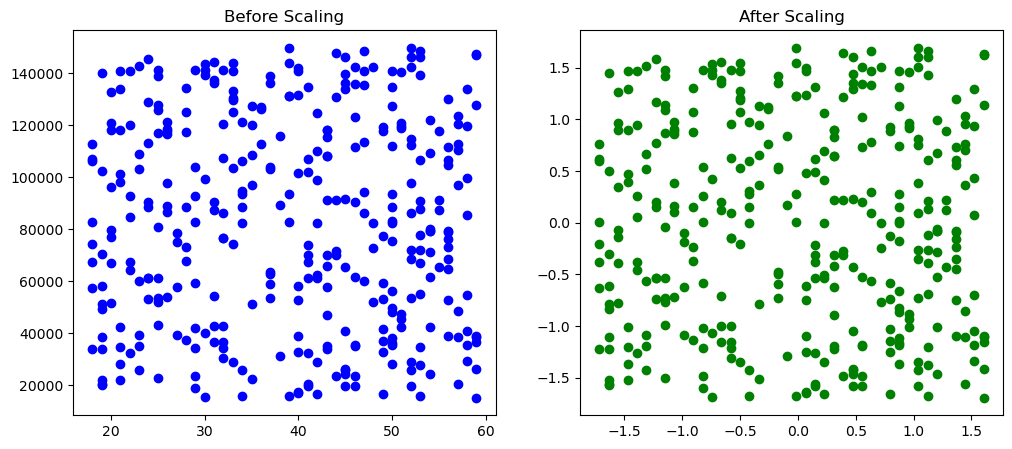

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Age'], X_train['Estimated_Salary'], color = 'blue')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['Estimated_Salary'], color = 'green')
ax2.set_title('After Scaling')
plt.show

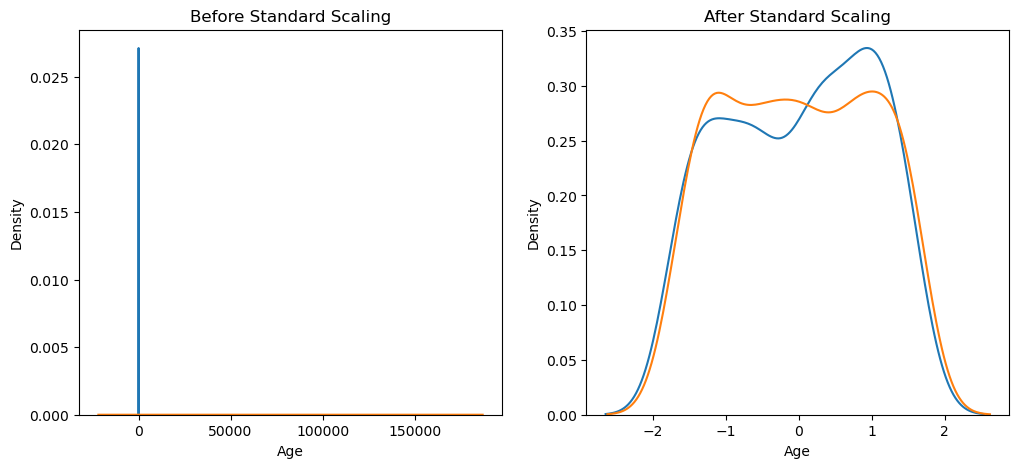

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.set_title('Before Standard Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Estimated_Salary'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Estimated_Salary'], ax=ax2)
plt.show()

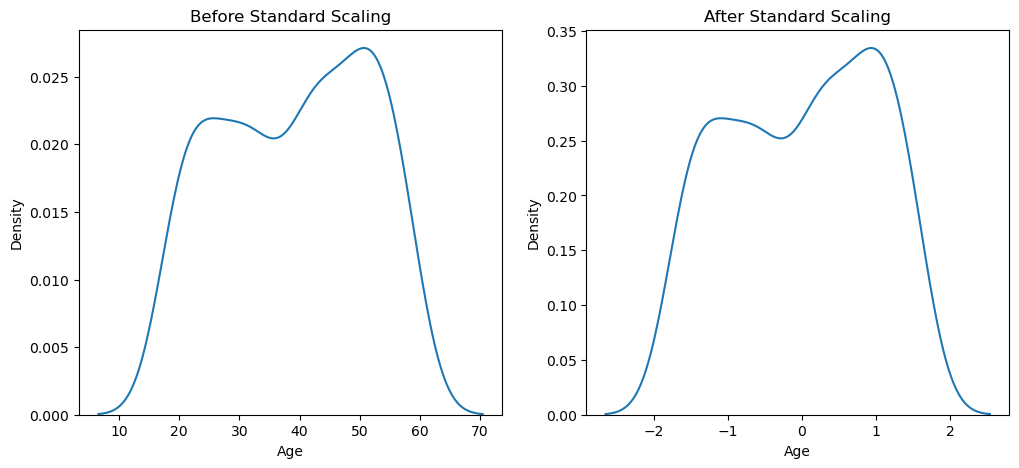

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.set_title('Before Standard Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

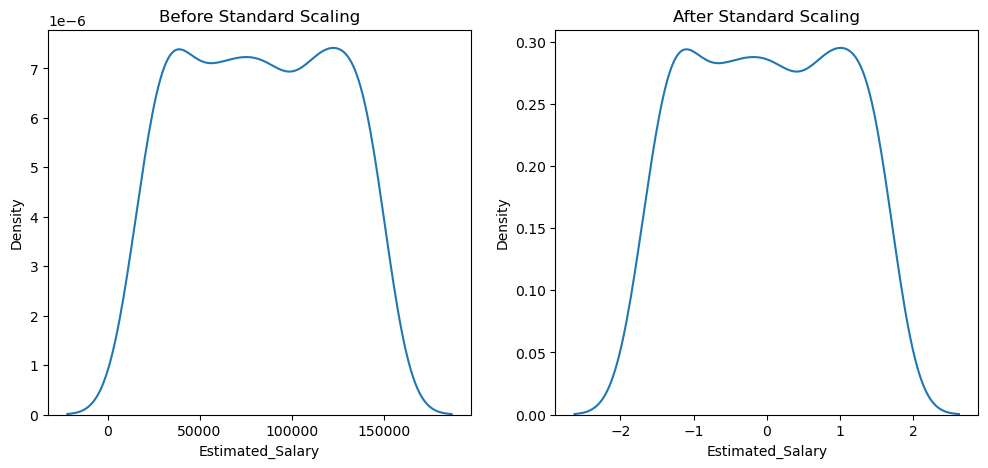

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.set_title('Before Standard Scaling')
sns.kdeplot(X_train['Estimated_Salary'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Estimated_Salary'], ax=ax2)
plt.show()

In [79]:
# Why is scaling is important

In [85]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [101]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [105]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [107]:
from sklearn.metrics import accuracy_score

In [111]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.54
Scaled 0.54


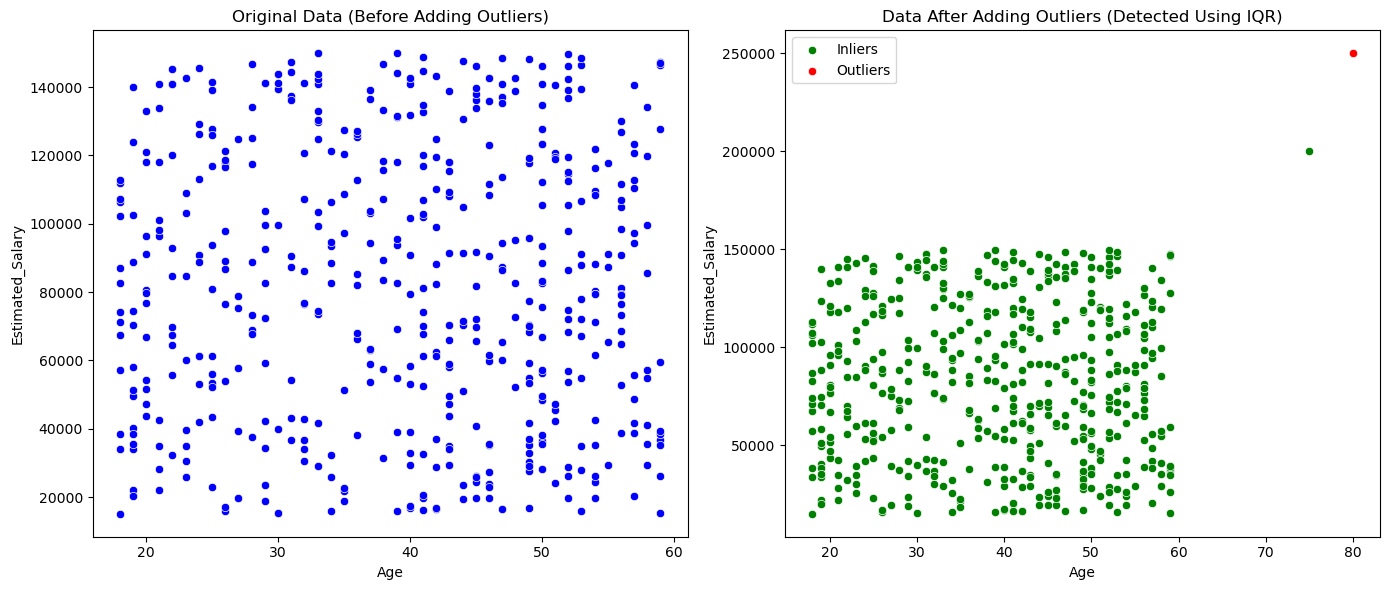

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./Dataset/purchase_dataset.csv')

# Add two large outliers to both 'Age' and 'Estimated_Salary'
outlier1 = {'Age': 80, 'Estimated_Salary': 250000}
outlier2 = {'Age': 75, 'Estimated_Salary': 200000}

# Append the outliers to the DataFrame
df_with_outliers = df.copy()
# df_with_outliers = df_with_outliers.append(outlier1, ignore_index=True)
df_with_outliers = pd.concat([df_with_outliers, pd.DataFrame([outlier1])], ignore_index=True)
df_with_outliers = pd.concat([df_with_outliers, pd.DataFrame([outlier2])], ignore_index=True)
# df_with_outliers = df_with_outliers.append(outlier2, ignore_index=True)

# Define features for outlier detection
X = df_with_outliers[['Age', 'Estimated_Salary']]

# Function to detect outliers using IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Filter rows that are outliers
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[outliers], data[~outliers]

# Detect outliers
outliers_df, no_outliers_df = detect_outliers(X)

# Plotting before and after adding outliers
plt.figure(figsize=(14, 6))

# Plot original data without added outliers
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Estimated_Salary', data=df, color='blue')
plt.title('Original Data (Before Adding Outliers)')

# Plot data with added outliers
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Estimated_Salary', data=no_outliers_df, color='green', label='Inliers')
sns.scatterplot(x='Age', y='Estimated_Salary', data=outliers_df, color='red', label='Outliers')
plt.title('Data After Adding Outliers (Detected Using IQR)')

plt.tight_layout()
plt.legend()
plt.show()

## 📌 Conclusion
Standardization ensures that each feature contributes equally to model training and helps improve model performance, especially in algorithms sensitive to feature scales (e.g., KNN, SVM, PCA).